In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [65]:
df = pd.read_csv('customer_data.csv')  # or encoding='cp1252'
print(df.head())

   CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0           1    Male   19                  15              39
1           2    Male   21                  15              81
2           3  Female   20                  16               6
3           4  Female   23                  16              77
4           5  Female   31                  17              40


In [66]:
#shape
df.shape

(200, 5)

In [70]:
print(df.isnull().sum())

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


In [72]:
print(df.duplicated().sum())

0


In [74]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool


In [76]:
print(df.dtypes)

CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object


In [78]:
print(df.describe)

<bound method NDFrame.describe of      CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0             1    Male   19                  15              39
1             2    Male   21                  15              81
2             3  Female   20                  16               6
3             4  Female   23                  16              77
4             5  Female   31                  17              40
..          ...     ...  ...                 ...             ...
195         196  Female   35                 120              79
196         197  Female   45                 126              28
197         198    Male   32                 126              74
198         199    Male   32                 137              18
199         200    Male   30                 137              83

[200 rows x 5 columns]>


In [89]:
# Drop non-numeric columns for scaling
numerical_features = df.drop(columns=["Genre"])

# Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

scaled_df = pd.DataFrame(scaled_data, columns=numerical_features.columns)

print(scaled_df.head())

   CustomerID       Age  Annual_Income_(k$)  Spending_Score   Cluster
0   -1.723412 -1.424569           -1.738999       -0.434801 -0.898986
1   -1.706091 -1.281035           -1.738999        1.195704 -0.898986
2   -1.688771 -1.352802           -1.700830       -1.715913 -1.651275
3   -1.671450 -1.137502           -1.700830        1.040418 -0.898986
4   -1.654129 -0.563369           -1.662660       -0.395980 -0.898986


C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

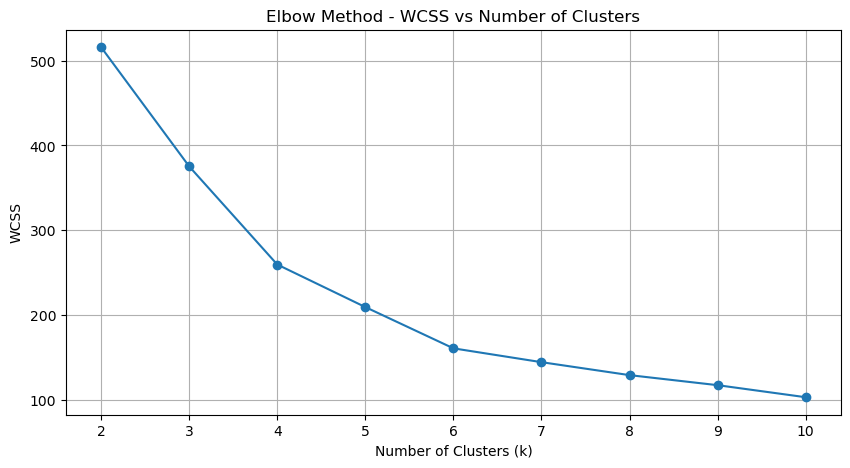

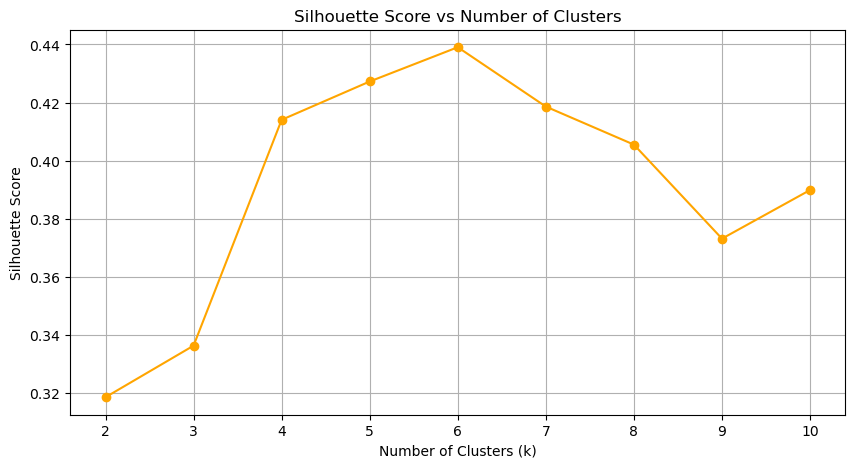

In [82]:
# Scale data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(numerical_features)

# Elbow method & silhouette score
wcss = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

# Plot WCSS
plt.figure(figsize=(10, 5))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method - WCSS vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

C:\Users\shubh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


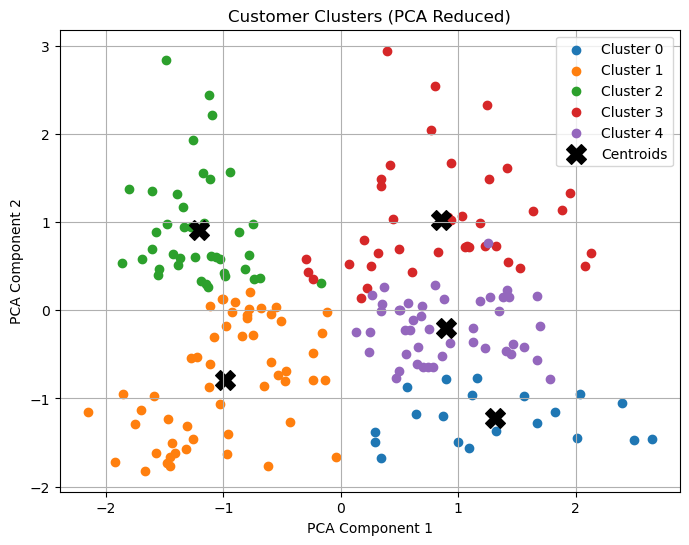

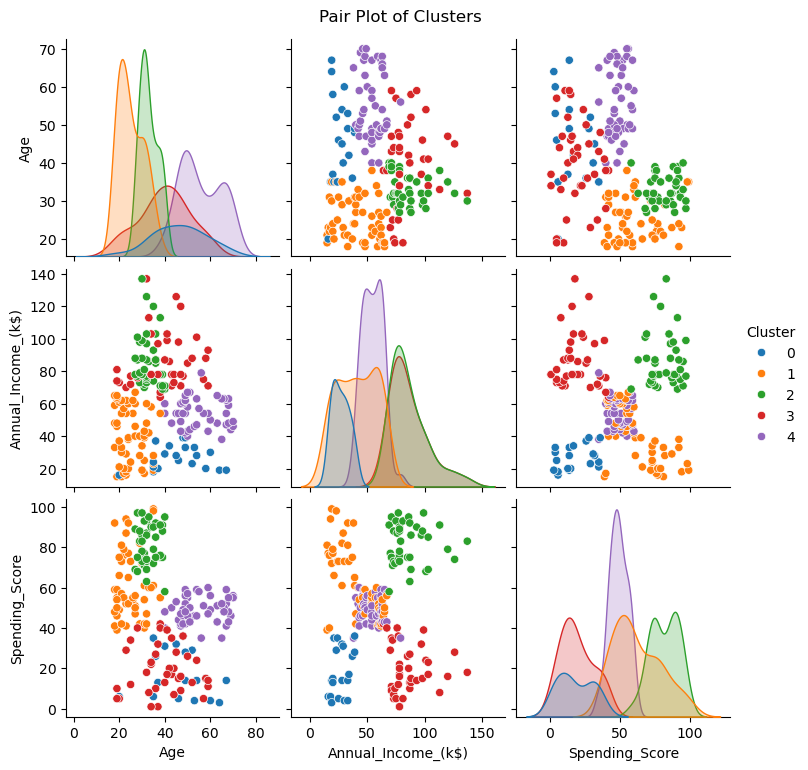

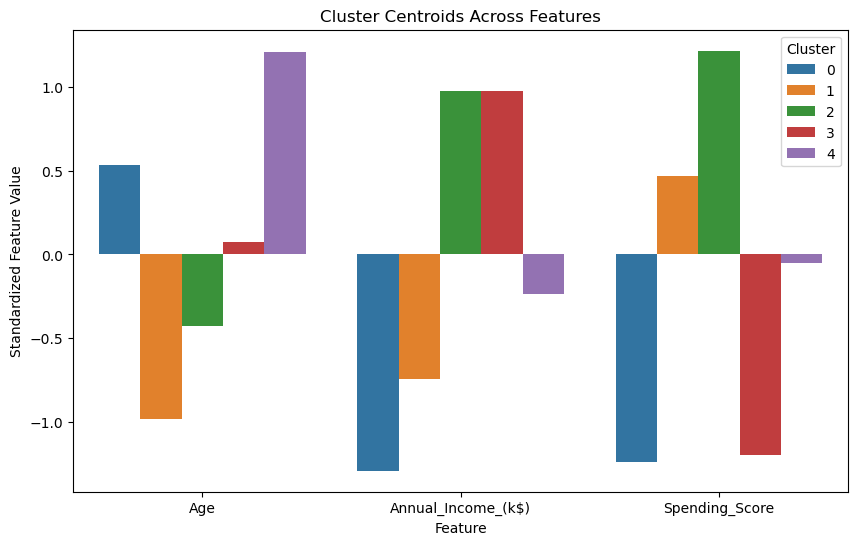

In [91]:
# Load and preprocess
df = pd.read_csv("customer_data.csv")
numerical_features = df.drop(columns=["CustomerID", "Genre"])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

# K-Means clustering (use k=5 or your chosen number based on elbow/silhouette)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to original DataFrame
df['Cluster'] = clusters

# --------------------------
# 1. 2D Scatter Plot with PCA
# --------------------------
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
for cluster in range(k):
    plt.scatter(reduced_data[clusters == cluster, 0],
                reduced_data[clusters == cluster, 1],
                label=f'Cluster {cluster}')
    
# Plot centroids in reduced PCA space
centroids_2d = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1],
            marker='X', s=200, color='black', label='Centroids')

plt.title('Customer Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.show()

# --------------------------
# 2. Pair Plot
# --------------------------
sns.pairplot(df, hue="Cluster", vars=["Age", "Annual_Income_(k$)", "Spending_Score"], palette='tab10')
plt.suptitle("Pair Plot of Clusters", y=1.02)
plt.show()

# --------------------------
# 3. Centroid Visualization 
# --------------------------
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=numerical_features.columns)
centroids_df["Cluster"] = centroids_df.index

# Melt for easier barplot
centroids_melted = pd.melt(centroids_df, id_vars="Cluster", var_name="Feature", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=centroids_melted, x="Feature", y="Value", hue="Cluster", palette="tab10")
plt.title("Cluster Centroids Across Features")
plt.ylabel("Standardized Feature Value")
plt.show()
